In [88]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [89]:
df = pd.read_csv('train_values.csv')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [91]:
df2 = pd.read_csv('train_labels.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [92]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')

In [93]:
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')

df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [95]:
df = df.merge(df2)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3


In [96]:
df.to_csv('dataset_v1')

In [97]:
print(df.shape)

(260601, 40)


El df unificado tiene 260601 filas y 41 columnas

### ¿Existe relacion entre la antiguedad de las edificaciones y el nivel de daños registrado a causa del terremoto?

Hipótesis: "Es probable que a mayor antiguedad, por el desgaste de los materiales con el tiempo, y el menor avance del desarrollo tecnológico en las construcciones, se evidencien mayores niveles de daño"

In [98]:
df['age'].value_counts().head(5)

10    38896
15    36010
5     33697
20    32182
0     26041
Name: age, dtype: int64

In [99]:
less_30=df['age']<=30
less_30

0          True
1          True
2          True
3          True
4          True
          ...  
260596    False
260597     True
260598    False
260599     True
260600     True
Name: age, Length: 260601, dtype: bool

In [100]:
less_30.sum()/260601

0.8028365201975434

Podemos observar que del total de edificaciones censadas, sobre un 80% tiene 30 años o menos

Text(0.5, 0, 'nivel de daño')

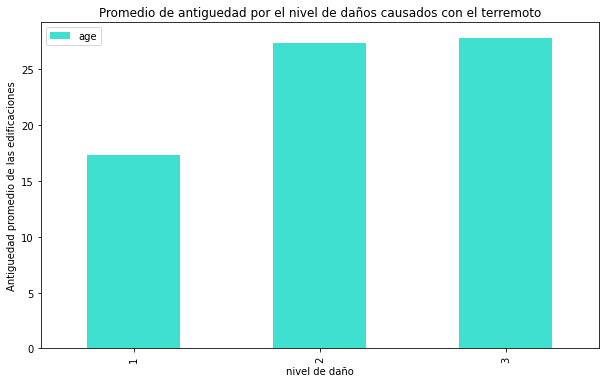

In [101]:
grouped_age=df.groupby(['damage_grade']).agg({'age':'mean'}).plot(kind='bar', title='Promedio de antiguedad por el nivel de daños causados con el terremoto', linewidth=2, figsize=(10,6), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Antiguedad promedio de las edificaciones');
ax.set_xlabel('nivel de daño')

Las edificaciones con menor nivel de daños, tienen en promedio alrededor de 17 años de antigüedad, y efectivamente para los edificios con mayores daños hay un promedio mayor de años de antiguedad. Sin embargo no se observa demasiada diferencia en años entre las edificaciones con daños medios y las con daños graves. Esto puede dar cuenta de otros factores, más allá de la edad interviniendo.

In [102]:
grouped_age_tabla=df.groupby(['damage_grade']).agg({'age':'mean'})
grouped_age_tabla

,age
damage_grade,
1,17.320490
2,27.342118
3,27.817423


In [103]:
df['unos']=1

In [104]:
conteo = df[['age','damage_grade','unos']].pivot_table(values='unos', columns='damage_grade',index='age',aggfunc=np.sum)
conteo.head(7)

damage_grade,1,2,3
age,,,
0,7213.0,12721.0,6107.0
5,5590.0,19030.0,9077.0
10,4360.0,22370.0,12166.0
15,2878.0,20767.0,12365.0
20,1954.0,18603.0,11625.0
25,1131.0,14073.0,9162.0
30,640.0,10444.0,6944.0


Text(0.5, 0, 'Antiguedad de la edificacion')

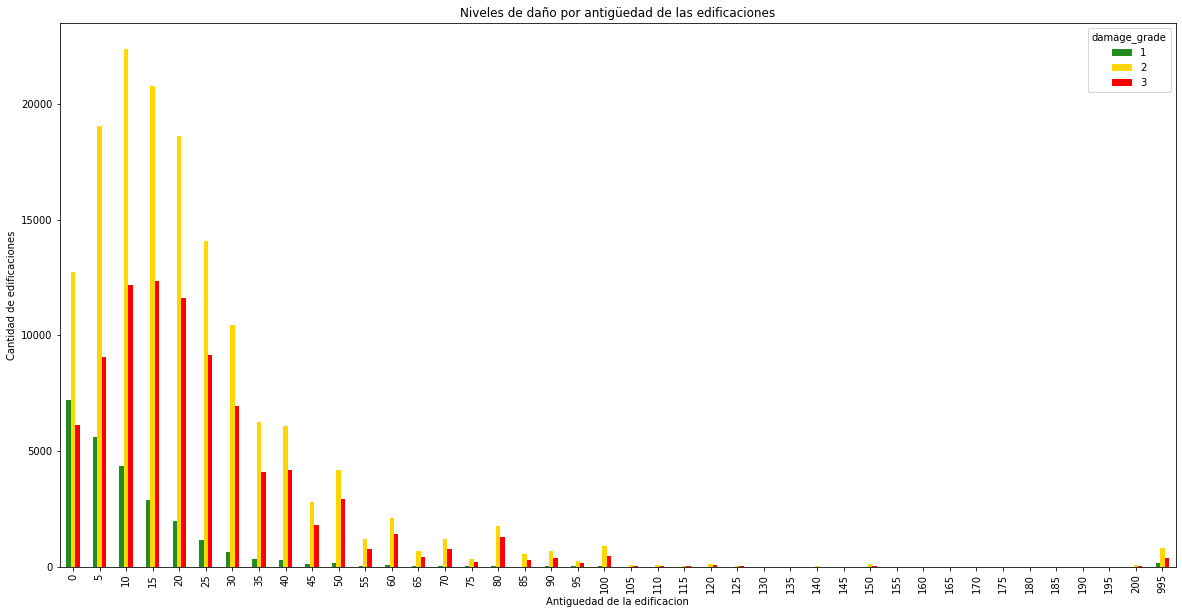

In [105]:
age_grupos=conteo.plot(kind='bar', title='Niveles de daño por antigüedad de las edificaciones', linewidth=2, figsize=(20,10), color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Antiguedad de la edificacion')

Tal como se vió anteriormente al analizar la los datos correspondientes al rotulo 'age', las edificaciones de 10, 15, 5, 20 y 0 años, son los que fueron mayormente registrados, con la gran mayoría del volumen de los datos en este rango.
Los daños considerados medios, aparecen más marcadamente en cada grupo de edificaciones de la misma antigüedad, abarcando alrrededor de la mitad de los casos. A continuación vienen los daños graves, y por último, con menor presencia los daños leves.
Tal como se consideró en la hipótesis, las edificaciones más "jóvenes" cuentan con más casos de daños leves y menos casos de daños graves. Con la antigüedad van creciendo en forma relativa los casos con daños graves, y disminuyendo a la vez los casos con daños leves.

A continuacion creo una nueva columna para el data frame, consistente en la variable de interés, restandole 1 a cada valor. Asi daño leve será 0, daño medio será 1 y daño grave será 0

In [106]:
cimientos_daños = df[['age','damage_grade','unos','foundation_type']].pivot_table(values='unos', columns='damage_grade',index='foundation_type',aggfunc=np.sum)
cimientos_daños

damage_grade,1,2,3
foundation_type,,,
h,358,579,511
i,6004,4354,221
r,10720,125515,82961
u,3689,8541,2030
w,4353,9270,1495


Text(0.5, 0, 'Tipo de cimientos (originales)')

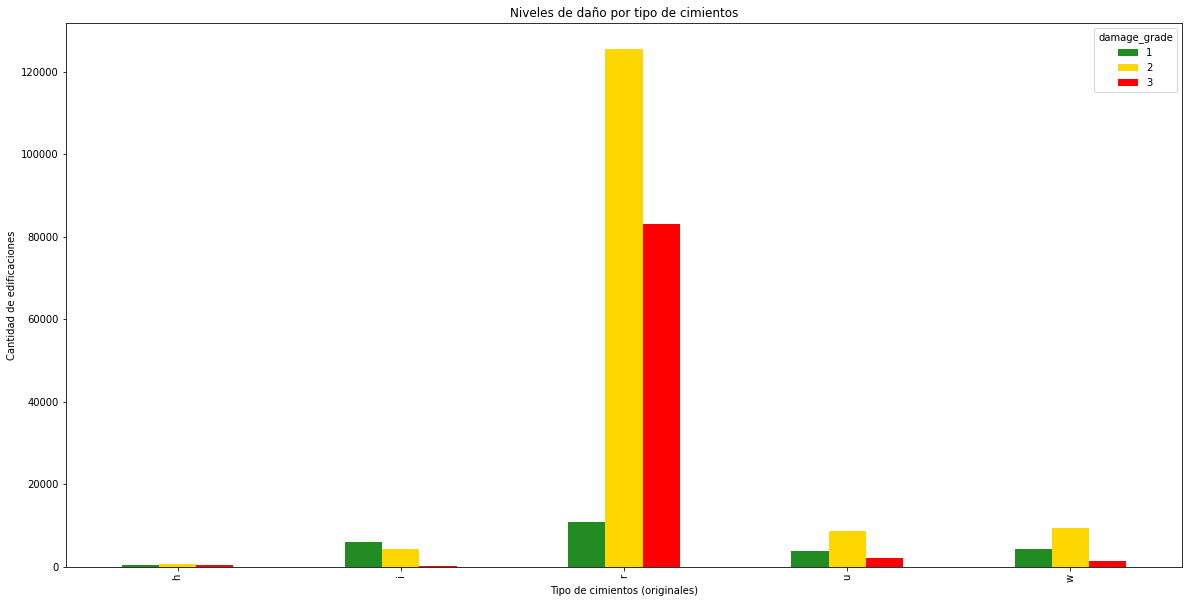

In [107]:
age_grupos = cimientos_daños\
            .plot(kind='bar', title='Niveles de daño por tipo de cimientos', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Tipo de cimientos (originales)')

Ya que este dataset está formado por contribuciones voluntarias de completitud de formularios, en froma de encuestas, y cruzadas con datos oficiales de los inmuebles registrados en el sistema nacional estatal, es posible afirmar, en primer término lo siguiente;
Los individuos que llenaron estas encuestas son en su mayoría personas, propietarias, usuarias o habitantes de edificaciones que contaban originalmente (al momento de ser construida la edificacion) con cimientos de tipo r. Estos cimientos se llevan la amplia cantidad de los registros. Concretamente, constituyen el 0.841% de los datos del presente conjunto. Anteriormente vimos que las edificaciones mas nuevas (de hasta 30 años) significaban alrededor del 80% de los datos. Podríamos hacer un parentesis a este análisis para cotejar, o hacer una intersección entre estos datasets. Para eso habría que por ejemplo joinear los datos, con un outer, luego contabilizar la cantidad de filas, y ese conteo dividirlo por la suma entre ambos datos.
Vemos tambien, que este tipo de cimientos son los que en proporción poseen una menor cantidad de edificaciones con daños leves. ¿Es decir que no eran tan buenos cimientos después de todo? Podría decirse que si, porque en primera instancia es el tipo de cimientos que más edificios registrados tiene (recordemos que las encuestas completadas corresponden en parte importante a personas interesadas en constatar los daños de sus viviendas para poder optar a beneficios estatales repararatorios o indemnizantes), con lo cual están asociados a edificaciones cuyos moradores estan interesados en obtener alguna ayuda estatal, lo que a su vez podría ser consecuencia de que terminaron efectivamente en mal estado. Esta 

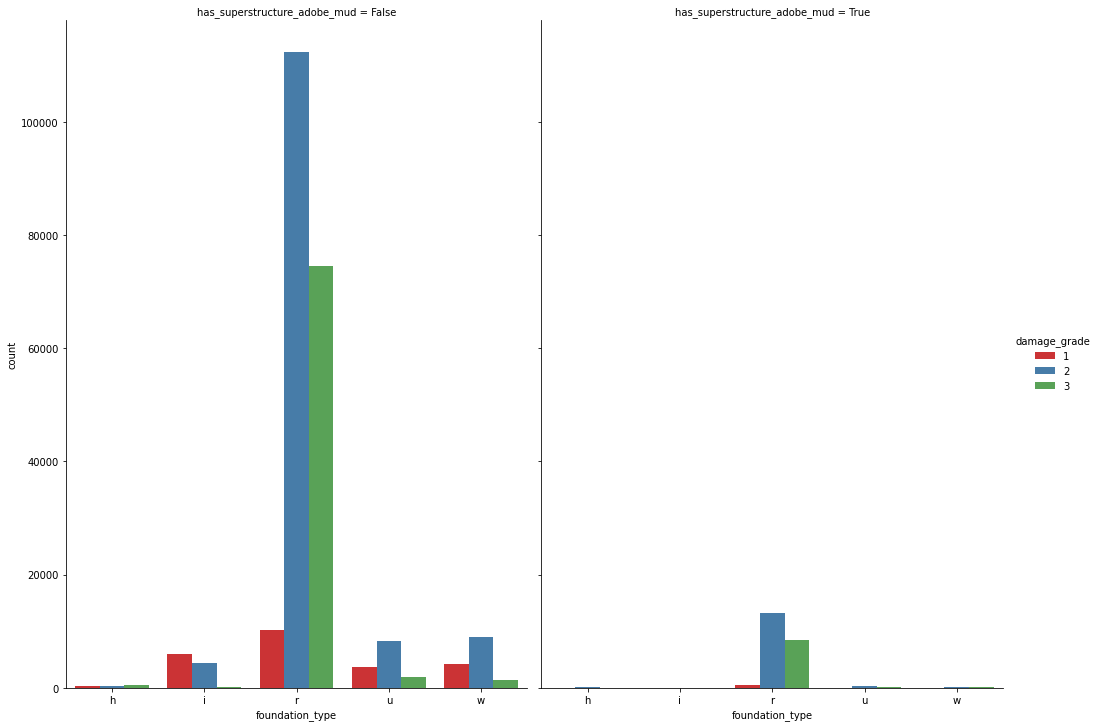

In [108]:
sns.catplot(x="foundation_type", hue="damage_grade", col="has_superstructure_adobe_mud",

                data=df, kind="count",

                height=10, aspect=.7, palette="Set1")

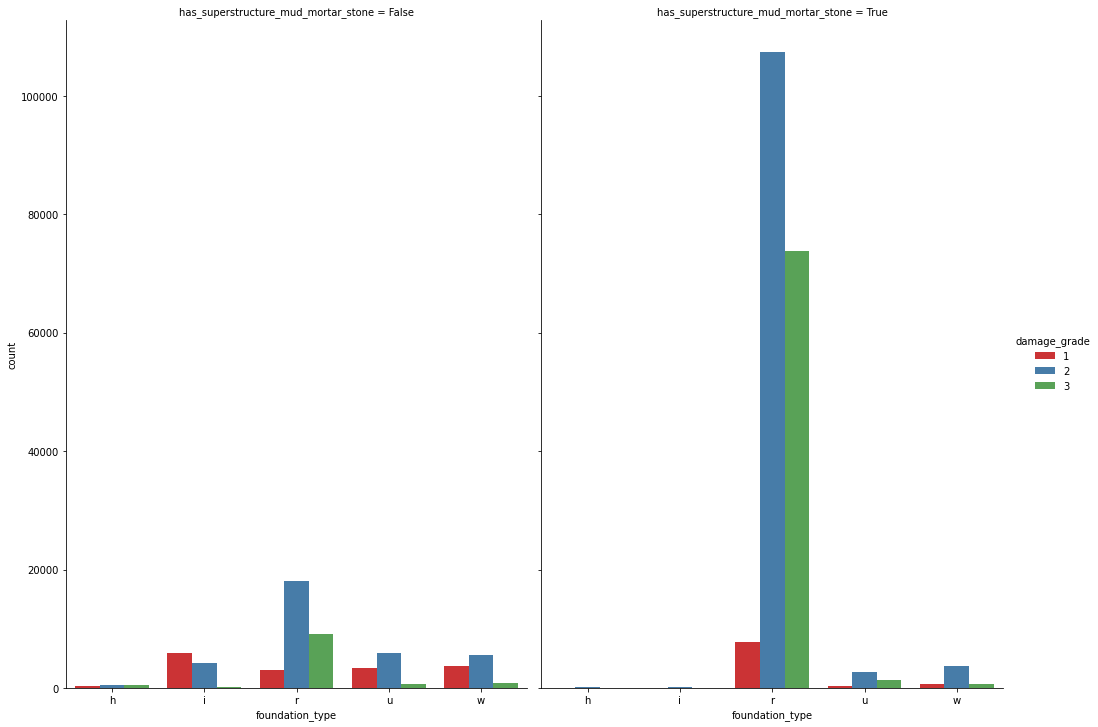

In [109]:
sns.catplot(x="foundation_type", hue="damage_grade", col="has_superstructure_mud_mortar_stone",

                data=df, kind="count",

                height=10, aspect=.7, palette="Set1")

Antes de continuar con el analisis voy a hacer una breve inspeccion de como resulto el terremoto para las otras variables categoricas

In [110]:
p_baja_daños = df[['damage_grade','unos','ground_floor_type']].pivot_table(values='unos', columns='damage_grade',index='ground_floor_type',aggfunc=np.sum)
p_baja_daños


damage_grade,1,2,3
ground_floor_type,,,
f,12474,119877,77268
m,90,343,75
v,10309,12971,1313
x,2052,14536,8289
z,199,532,273


Text(0.5, 0, 'Tipo de construccion en planta baja')

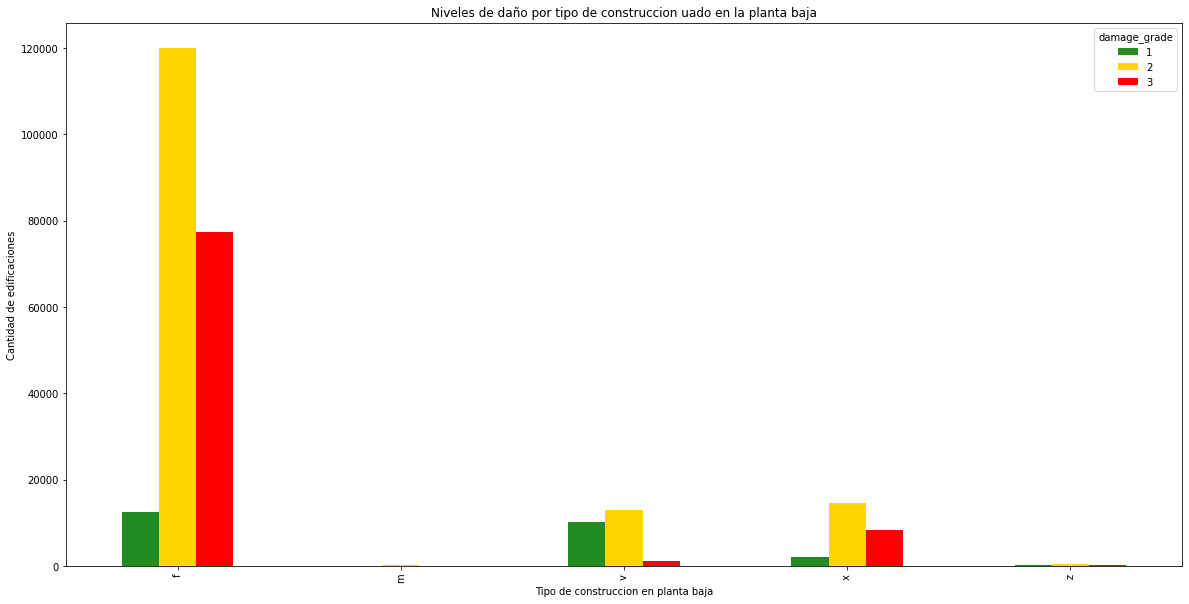

In [111]:
p_baja_grupos = p_baja_daños\
            .plot(kind='bar', title='Niveles de daño por tipo de construccion uado en la planta baja', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Tipo de construccion en planta baja')


Predominan registros de tipo de construccion "f" de la planta baja, y en ellos, como en otros casos la tendencia es mayor presencia de daños medios y luego daños serios.

In [112]:
formato_construccion_daños = df[['damage_grade','unos','plan_configuration']].pivot_table(values='unos', columns='damage_grade',index='plan_configuration',aggfunc=np.sum)
formato_construccion_daños


damage_grade,1,2,3
plan_configuration,,,
a,66.0,157.0,29.0
c,86.0,206.0,33.0
d,23310.0,142523.0,84239.0
f,NaN,16.0,6.0
m,8.0,34.0,4.0
n,6.0,20.0,12.0
o,40.0,96.0,23.0
q,781.0,2585.0,2326.0
s,53.0,223.0,70.0


Text(0.5, 0, 'Formato de construccion de las edificaciones')

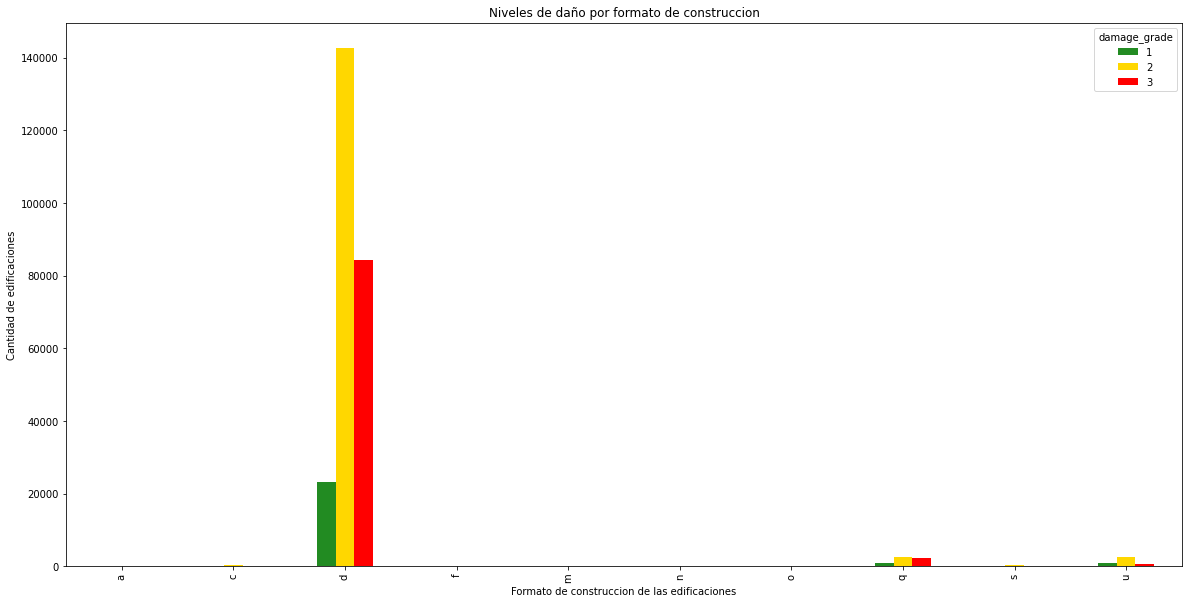

In [113]:
formato_construccion_daños_grupos = formato_construccion_daños\
            .plot(kind='bar', title='Niveles de daño por formato de construccion', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Formato de construccion de las edificaciones')

El formato de construccion d es el que tiene mayor presencia en el dataset, como antes tambien observamos una tendencia de daños medios-graves. Probablemente este diseño en particular es o muy popular o de baja calidad para enfrentar un acontecimiento natural de carácter sísmico

In [114]:
otros_pisos_daños = df[['damage_grade','unos','other_floor_type']].pivot_table(values='unos', columns='damage_grade',index='other_floor_type',aggfunc=np.sum)
otros_pisos_daños

damage_grade,1,2,3
other_floor_type,,,
j,8886,20362,10595
q,7387,98320,59575
s,5423,5904,701
x,3428,23673,16347


Text(0.5, 0, 'Tipo de construccion en otros pisos')

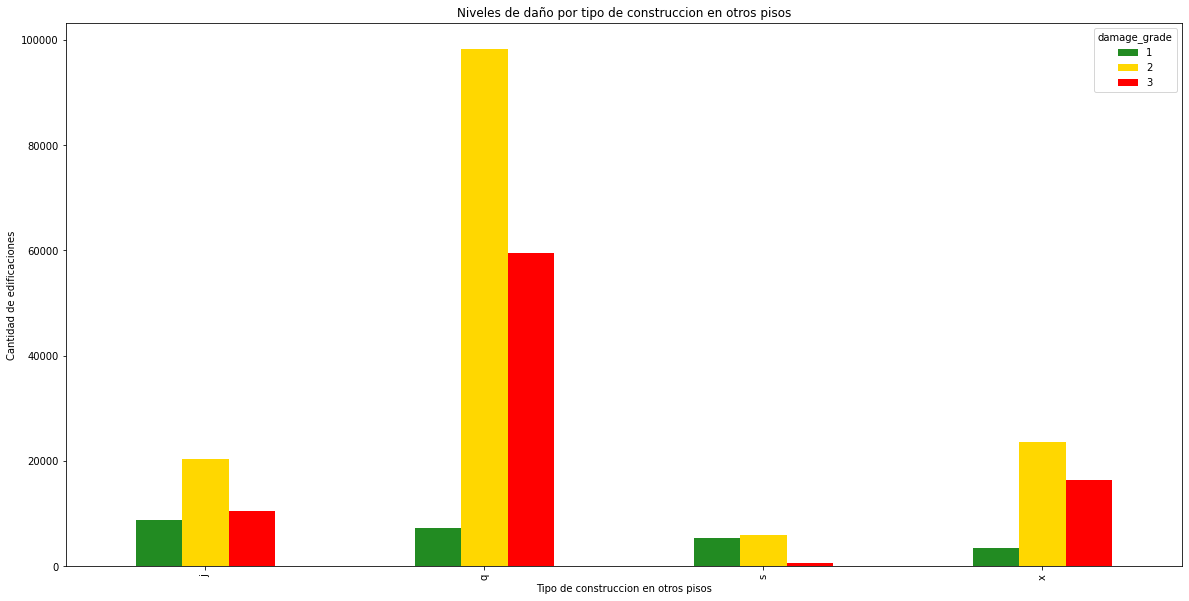

In [115]:
otros_pisos_grupos = otros_pisos_daños\
            .plot(kind='bar', title='Niveles de daño por tipo de construccion en otros pisos', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Tipo de construccion en otros pisos')


En este punto observamos una notoria presencia de registros asociados a un tipo de construccion, en pisos distintos a la planta baja, q. Con lo cual nuevamente estamos ante la duda de si corresponde a un tipo de construccion muy popular o bien a un tipo de construccion no apta para enfrentar sismos

In [116]:
techo_daños = df[['damage_grade','unos','roof_type']].pivot_table(values='unos', columns='damage_grade',index='roof_type',aggfunc=np.sum)
techo_daños

damage_grade,1,2,3
roof_type,,,
n,13547,106447,62848
q,3926,34009,23641
x,7651,7803,729


Text(0.5, 0, 'Tipo de techo')

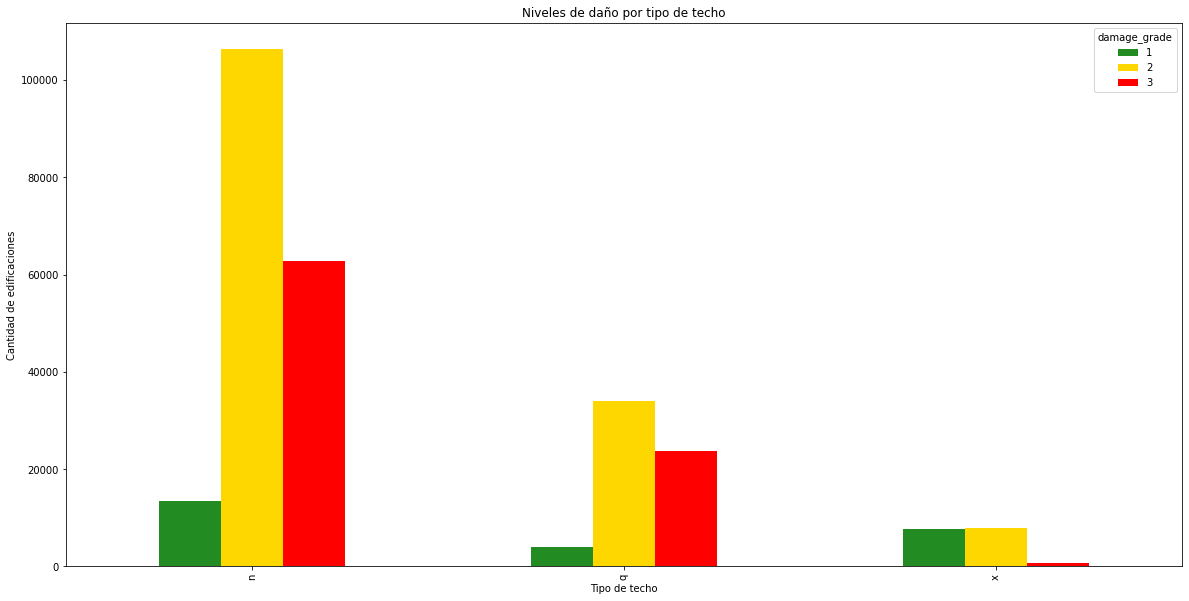

In [117]:
techo_grupos = techo_daños\
            .plot(kind='bar', title='Niveles de daño por tipo de techo', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Tipo de techo')

El tipo de techo con más presencia en el dataset es techo de tipo n, seguido del techo tipo q. El techo x por otra parte con menos presencia en el dataset tiene al mismo tiempo una bajísima presencia de daños graves

In [118]:
superficie_daños = df[['damage_grade','unos','land_surface_condition']].pivot_table(values='unos', columns='damage_grade',index='land_surface_condition',aggfunc=np.sum)
superficie_daños


damage_grade,1,2,3
land_surface_condition,,,
n,2556,21484,11488
o,602,4708,3006
t,21966,122067,72724


Text(0.5, 0, 'condicion de la superficie')

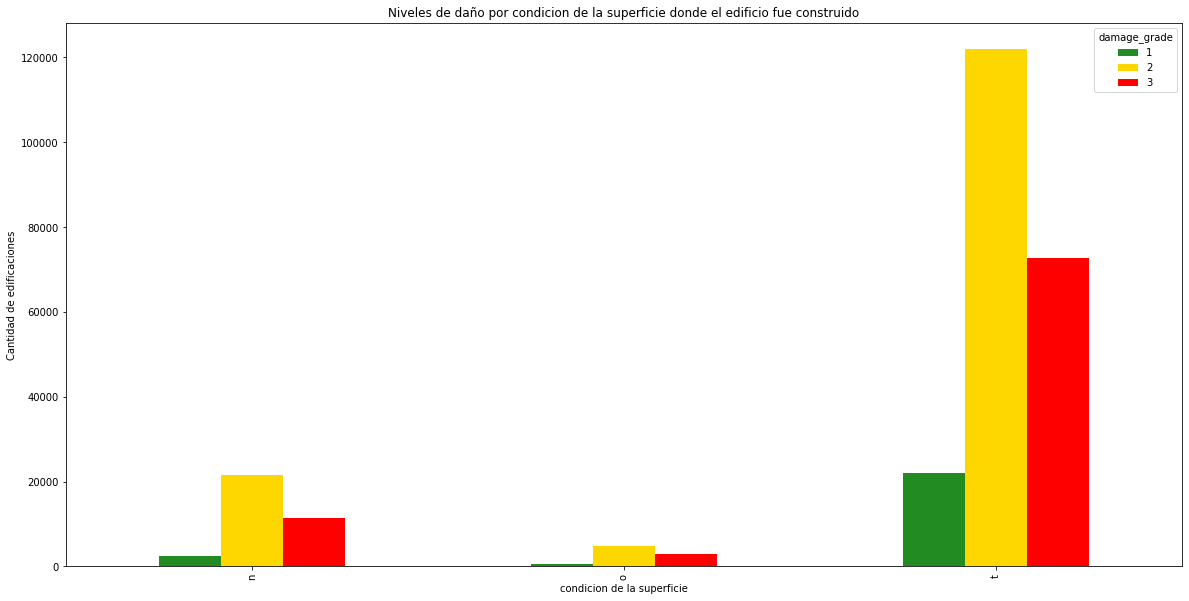

In [119]:
superficie_grupos = superficie_daños\
            .plot(kind='bar', title='Niveles de daño por condicion de la superficie donde el edificio fue construido', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('condicion de la superficie')

En este caso tambien hay una categoría que tiene la gran mayoría de los registros, y se refiere a la condicion de la superficie t, en que fueron construidos los edificios. La tendencia es de daños medios a graves.

In [120]:
orientacion_daños = df[['damage_grade','unos','position']].pivot_table(values='unos', columns='damage_grade',index='position',aggfunc=np.sum)
orientacion_daños


damage_grade,1,2,3
position,,,
j,1675,7899,3708
o,120,1609,604
s,19867,116051,66172
t,3462,22700,16734


Text(0.5, 0, 'Orientación de la edificación')

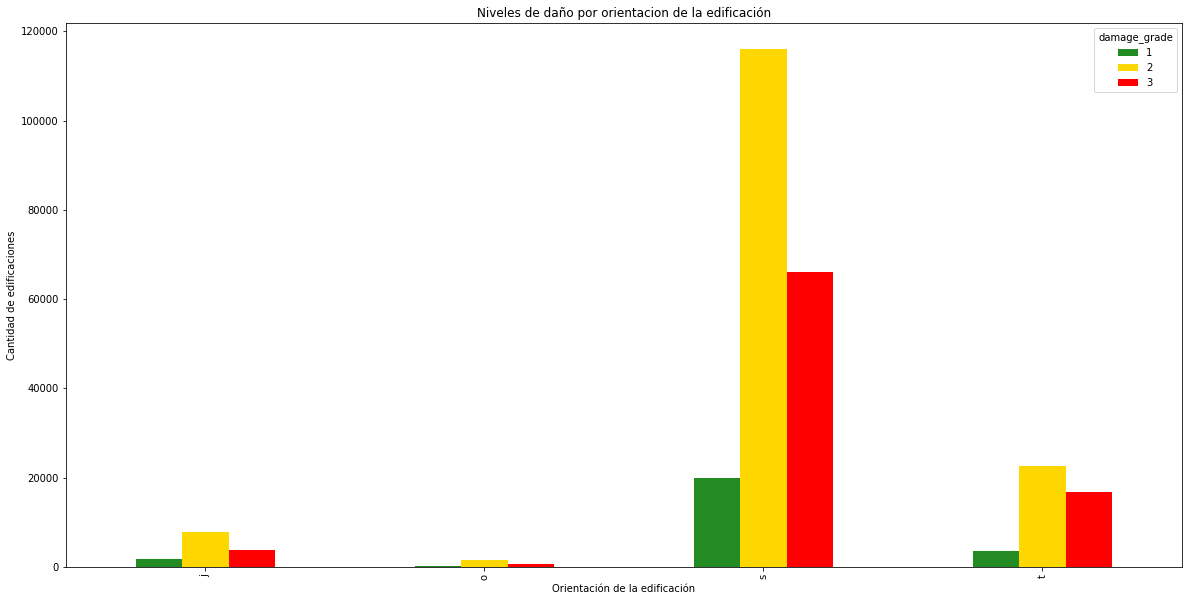

In [121]:
orientacion_grupos = orientacion_daños\
            .plot(kind='bar', title='Niveles de daño por orientacion de la edificación', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Orientación de la edificación')

En este caso podemos apreciar que la orientación s es la que mas se repite en el conjunto de datos. Reiteramos, esto no necesariamente quiere decir que esa orientacion en particular es poco conveniente para edificar en lo referente a resistir los embates de un sismo, sino que simplemente puede tratarse (sobre todo en este caso parece razonable esta conclusión) de la orientación que más típicamente toman las viviendas en el registro.

In [122]:
legal_daños = df[['damage_grade','unos','legal_ownership_status']].pivot_table(values='unos', columns='damage_grade',index='legal_ownership_status',aggfunc=np.sum)
legal_daños


damage_grade,1,2,3
legal_ownership_status,,,
a,1511,3074,927
r,213,727,533
v,23270,143154,84515
w,130,1304,1243


Text(0.5, 0, 'Estado legal de la tierra donde fueron construidas las edificaciones')

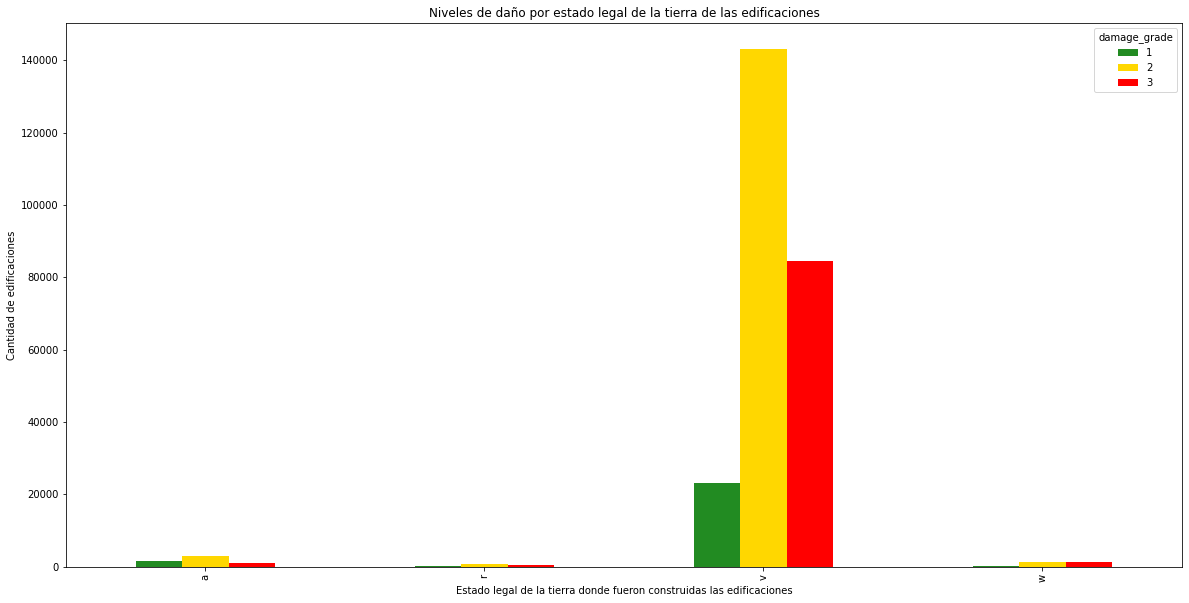

In [123]:
legal_grupos = legal_daños\
            .plot(kind='bar', title='Niveles de daño por estado legal de la tierra de las edificaciones', linewidth=2, figsize=(20,10),\
            color=['forestgreen','gold','red']);
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones');
ax.set_xlabel('Estado legal de la tierra donde fueron construidas las edificaciones')

Una vez más los resultados de este tipo de ploteo para variables categóricas arroja un resultado similar. El set de datos tiene una amplia presencia de edificaciones construidas sobre tierra con estado legal "v", con niveles de daños que van principalmente de medios a serios. Nuevamente no es posible afirmar que este estado se relaciona causalmente con mayores problemas estructurales de los inmuebles posterior al terremoto, ya que posiblemente se trate unicamente del estado legal mas comun para los terrenos con edificaciones.

In [124]:
df['damage_grade_b']=df['damage_grade']-1
df['damage_grade_b'].describe()

count    260601.000000
mean          1.238272
std           0.611814
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: damage_grade_b, dtype: float64

Text(0.5, 0, 'Antiguedad en años de la construccion')

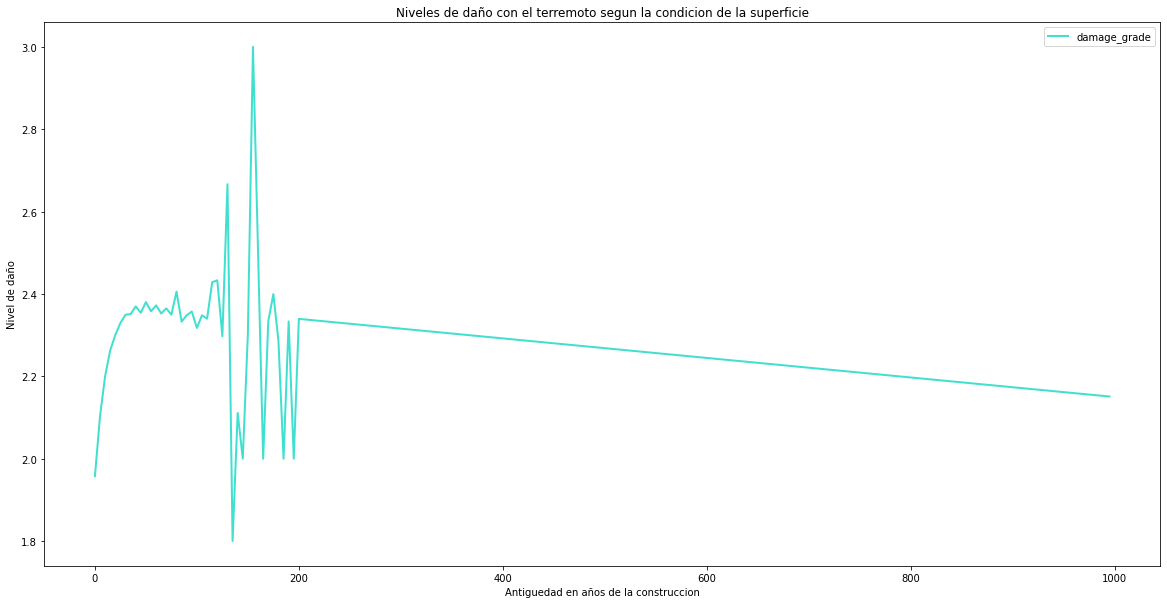

In [125]:
grouped_age=df.groupby(['age']).agg({'damage_grade':'mean'}).plot(kind='line', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(20,10), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Antiguedad en años de la construccion')

Text(0.5, 0, 'Antiguedad en años de la construccion')

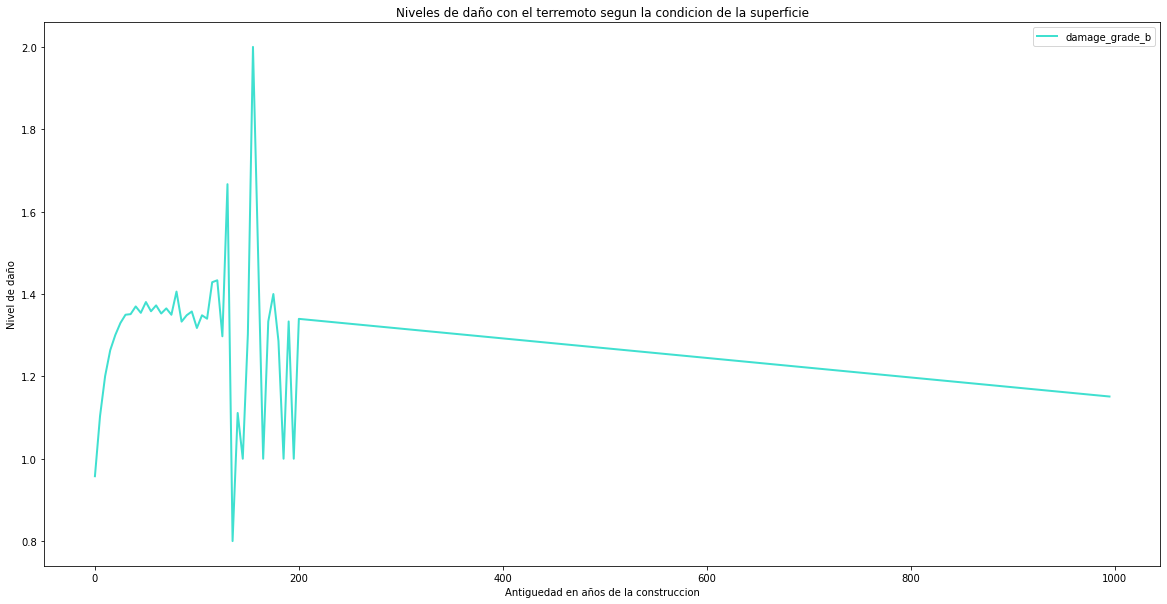

In [126]:
grouped_age=df.groupby(['age']).agg({'damage_grade_b':'mean'}).plot(kind='line', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(20,10), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Antiguedad en años de la construccion')

Aparentemente los edificios muy nuevos son los que tuvieron menor grado de daño. El Nivel de daño aumenta de manera continua hasta los primeros 40 años de antiguedad aproximadamente, luego se experimenta un descenso irregular del grado de daño, pero pasando los 100 años se producen tendencias muy radicales y distintas en cuanto a las consecuencias que dejó el sismo, por lo cual no aventuraría una interpretación al respecto.

In [127]:
df_entero=df[['geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','height_percentage','area_percentage','count_families','age']]
df_entero

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,6,487,12198,2,5,6,1,30
1,8,900,2812,2,7,8,1,10
2,21,363,8973,2,5,5,1,10
3,22,418,10694,2,5,6,1,10
4,11,131,1488,3,9,8,1,30
...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,3,6,1,55
260597,17,715,2060,2,5,6,1,0
260598,17,51,8163,3,7,6,1,55
260599,26,39,1851,2,6,14,1,10


In [128]:
df_entero['height_percentage'].describe()

count    260601.000000
mean          5.434365
std           1.918418
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          32.000000
Name: height_percentage, dtype: float64

In [129]:
df_entero['area_percentage'].describe()

count    260601.000000
mean          8.018051
std           4.392231
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         100.000000
Name: area_percentage, dtype: float64

In [130]:
df_int_escalado_simple=pd.DataFrame()

In [131]:
df_int_escalado_simple['count_floors_pre_eq']=df_entero['count_floors_pre_eq']/df_entero['count_floors_pre_eq'].max()
df_int_escalado_simple['height_percentage']=df_entero['height_percentage']/df_entero['height_percentage'].max()
df_int_escalado_simple['area_percentage']=df_entero['area_percentage']/100
df_int_escalado_simple['count_families']=df_entero['count_families']/df_entero['count_families'].max()
df_int_escalado_simple['age']=df_entero['age']/df_entero['age'].max()
df_int_escalado_simple

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,0.222222,0.15625,0.06,0.111111,0.030151
1,0.222222,0.21875,0.08,0.111111,0.010050
2,0.222222,0.15625,0.05,0.111111,0.010050
3,0.222222,0.15625,0.06,0.111111,0.010050
4,0.333333,0.28125,0.08,0.111111,0.030151
...,...,...,...,...,...
260596,0.111111,0.09375,0.06,0.111111,0.055276
260597,0.222222,0.15625,0.06,0.111111,0.000000
260598,0.333333,0.21875,0.06,0.111111,0.055276
260599,0.222222,0.18750,0.14,0.111111,0.010050


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

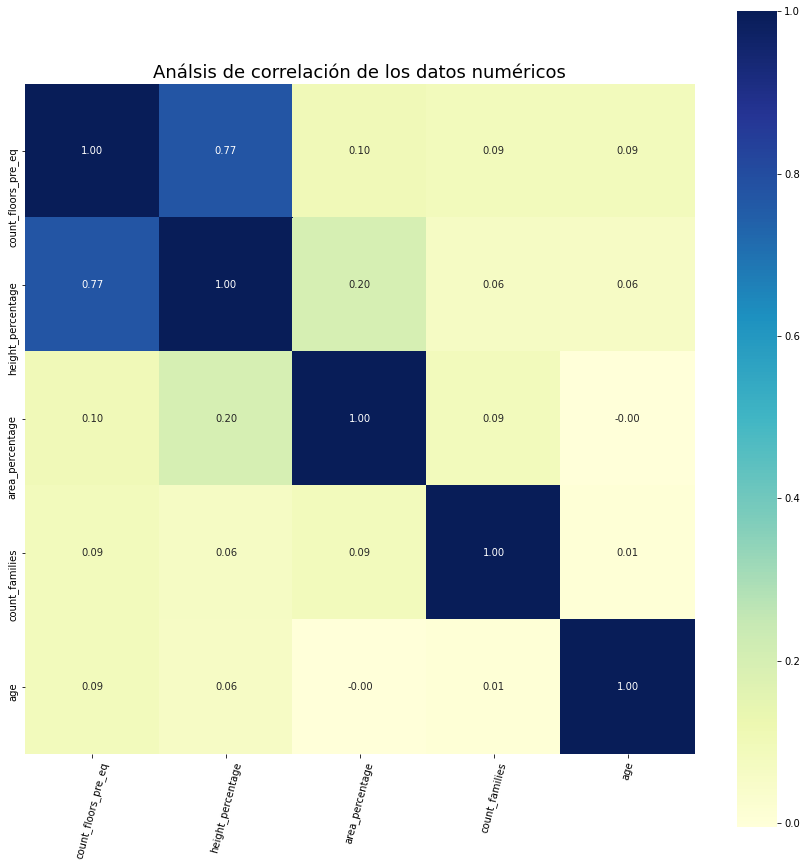

In [132]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_escalado_simple.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


In [133]:
df_int_minimo_maximo=pd.DataFrame()

In [134]:
df_int_minimo_maximo['count_floors_pre_eq']=(df_entero['count_floors_pre_eq']-df_entero['count_floors_pre_eq'].min())/(df_entero['count_floors_pre_eq'].max()-df_entero['count_floors_pre_eq'].min())
df_int_minimo_maximo['height_percentage']=(df_entero['height_percentage']-df_entero['height_percentage'].min())/(df_entero['height_percentage'].max()-df_entero['height_percentage'].min())
df_int_minimo_maximo['area_percentage']=(df_entero['area_percentage']-df_entero['area_percentage'].min())/(df_entero['area_percentage'].max()-df_entero['area_percentage'].min())
df_int_minimo_maximo['count_families']=(df_entero['count_families']-df_entero['count_families'].min())/(df_entero['count_families'].max()-df_entero['count_families'].min())
df_int_minimo_maximo['age']=(df_entero['age']-df_entero['age'].min())/(df_entero['age'].max()-df_entero['age'].min())
df_int_minimo_maximo

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,0.125,0.100000,0.050505,0.111111,0.030151
1,0.125,0.166667,0.070707,0.111111,0.010050
2,0.125,0.100000,0.040404,0.111111,0.010050
3,0.125,0.100000,0.050505,0.111111,0.010050
4,0.250,0.233333,0.070707,0.111111,0.030151
...,...,...,...,...,...
260596,0.000,0.033333,0.050505,0.111111,0.055276
260597,0.125,0.100000,0.050505,0.111111,0.000000
260598,0.250,0.166667,0.050505,0.111111,0.055276
260599,0.125,0.133333,0.131313,0.111111,0.010050


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

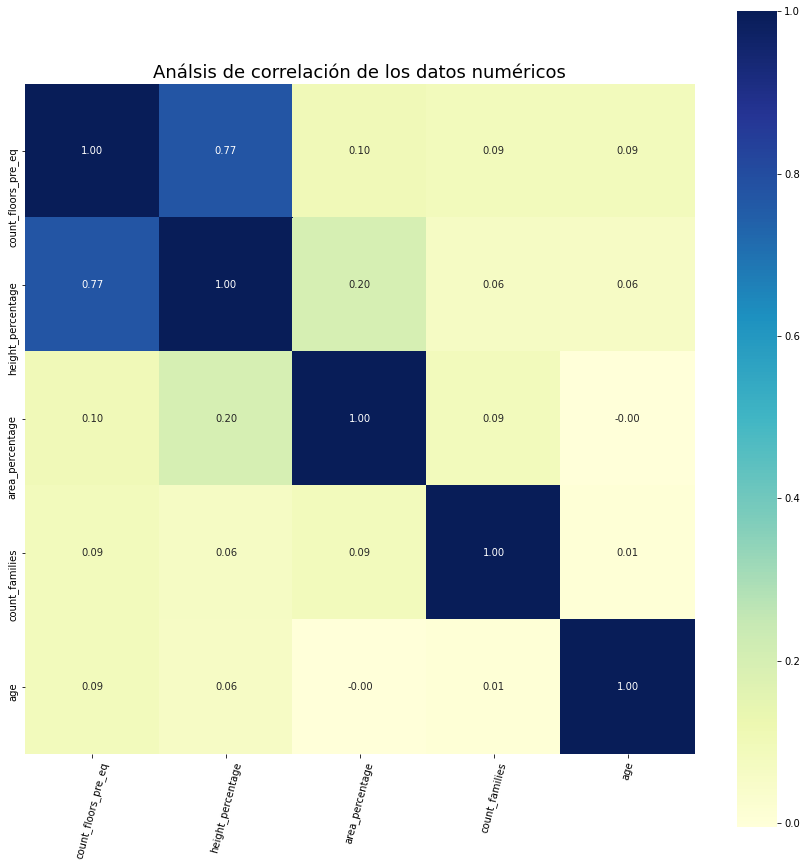

In [135]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_minimo_maximo.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


In [136]:
df_int_z_score=pd.DataFrame()

In [137]:
df_int_z_score['count_floors_pre_eq']=(df_entero['count_floors_pre_eq']-df_entero['count_floors_pre_eq'].mean())/df_entero['count_floors_pre_eq'].std()
df_int_z_score['height_percentage']=(df_entero['height_percentage']-df_entero['height_percentage'].mean())/df_entero['height_percentage'].std()
df_int_z_score['area_percentage']=(df_entero['area_percentage']-df_entero['area_percentage'].mean())/df_entero['area_percentage'].std()
df_int_z_score['count_families']=(df_entero['count_families']-df_entero['count_families'].mean())/df_entero['count_families'].std()
df_int_z_score['age']=(df_entero['age']-df_entero['age'].mean())/df_entero['age'].std()
df_int_z_score

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,-0.178273,-0.226418,-0.459459,0.038365,0.047100
1,-0.178273,0.816107,-0.004110,0.038365,-0.224765
2,-0.178273,-0.226418,-0.687134,0.038365,-0.224765
3,-0.178273,-0.226418,-0.459459,0.038365,-0.224765
4,1.195986,1.858633,-0.004110,0.038365,0.047100
...,...,...,...,...,...
260596,-1.552533,-1.268944,-0.459459,0.038365,0.386931
260597,-0.178273,-0.226418,-0.459459,0.038365,-0.360697
260598,1.195986,0.816107,-0.459459,0.038365,0.386931
260599,-0.178273,0.294844,1.361939,0.038365,-0.224765


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

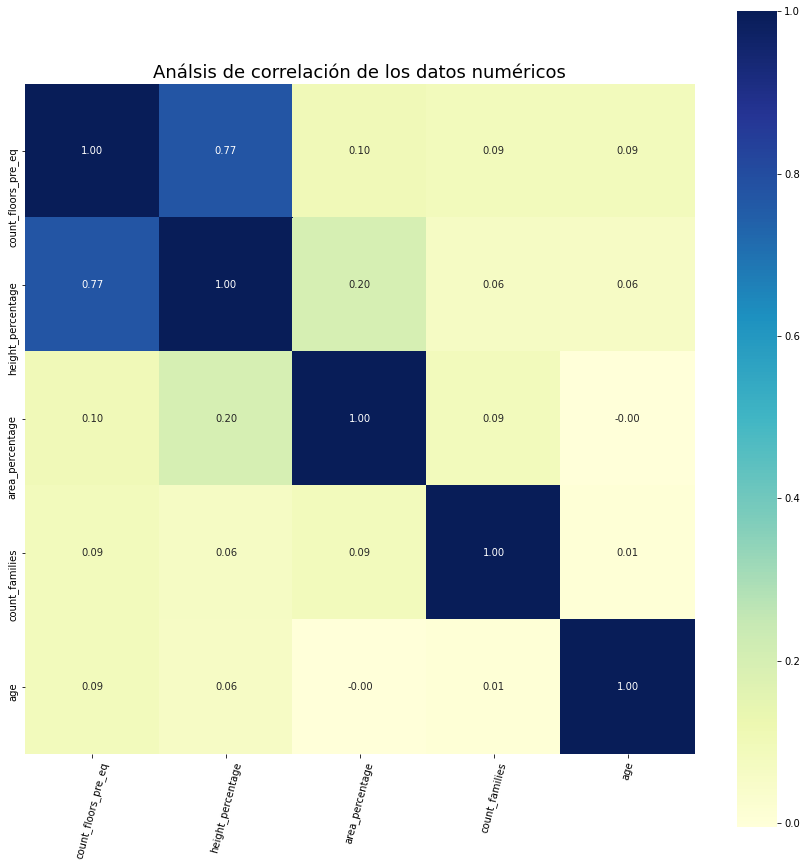

In [138]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_z_score.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)

### ¿Habrá ciertos tipos de condiciones de la superficie terrestre en que los edificios fueron construidos, asociadas a los niveles de daño registrados en estos?

Hipótesis: “Parece razonable que distintas condiciones en el suelo de la edificación haya contribuido a resistir mejor o peor a la catástrofe”

Text(0.5, 0, 'Condicion de la superficie de la construccion')

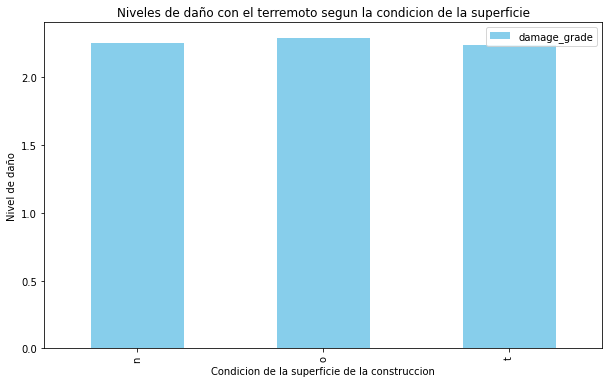

In [139]:
grouped_age=df.groupby(['land_surface_condition']).agg({'damage_grade':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='skyblue');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Condicion de la superficie de la construccion')

Text(0.5, 0, 'Condicion de la superficie de la construccion')

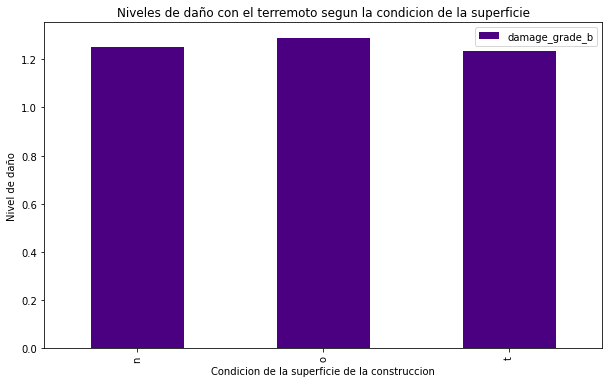

In [140]:
grouped_age=df.groupby(['land_surface_condition']).agg({'damage_grade_b':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='indigo');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Condicion de la superficie de la construccion')

Text(0.5, 0, 'Nivel de daño')

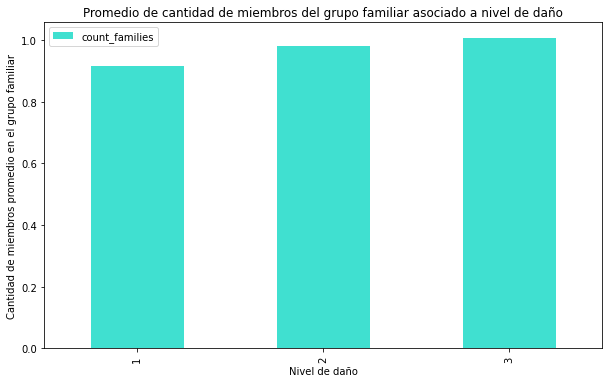

In [141]:
grouped_count_families=df.groupby(['damage_grade']).agg({'count_families':'mean'}).plot(kind='bar', title='Promedio de cantidad de miembros del grupo familiar asociado a nivel de daño', linewidth=2, figsize=(10,6), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Cantidad de miembros promedio en el grupo familiar');
ax.set_xlabel('Nivel de daño')

In [142]:
df['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

Text(0.5, 0, 'Nivel de daño')

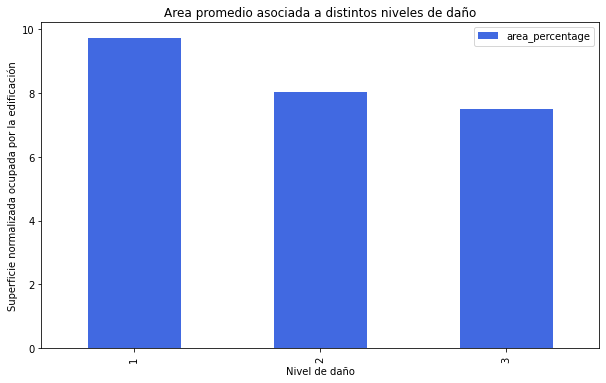

In [143]:
grouped_count_families=df.groupby(['damage_grade']).agg({'area_percentage':'mean'}).plot(kind='bar', title='Area promedio asociada a distintos niveles de daño', linewidth=2, figsize=(10,6), color='royalblue');
ax=plt.gca()
ax.set_ylabel('Superficie normalizada ocupada por la edificación');
ax.set_xlabel('Nivel de daño')

Existe una relacion inversa, no tan marcada entre area y gravedad de daños con el terremoto. Los niveles mas leves de daño están asociados con areas más amplias, y a la inversa los niveles más graves de daño se asocian a areas en promedio más reducidas.